In [105]:
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
import random

In [106]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import pandas as pd

In [107]:
#load dataset

In [108]:
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')

x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [109]:
x_train = x_train.reshape(len(x_train),100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [110]:
x_train = x_train/255.0
x_test = x_test/255.0

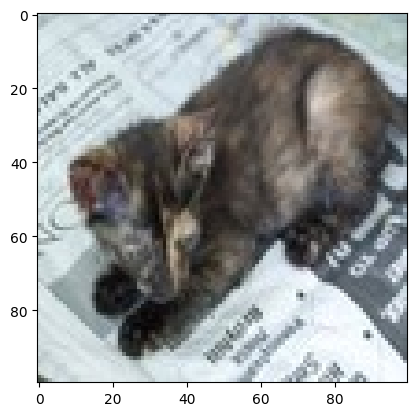

In [111]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [112]:
#Model

In [113]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [114]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [115]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 15s 463ms/step - loss: 0.3957 - accuracy: 0.8335
Epoch 2/5
32/32 [==============================] - 15s 457ms/step - loss: 0.3388 - accuracy: 0.8555
Epoch 3/5
32/32 [==============================] - 15s 473ms/step - loss: 0.2793 - accuracy: 0.8845
Epoch 4/5
32/32 [==============================] - 14s 450ms/step - loss: 0.2024 - accuracy: 0.9290
Epoch 5/5
32/32 [==============================] - 14s 438ms/step - loss: 0.1433 - accuracy: 0.9555


In [118]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 65ms/step - loss: 0.9510 - accuracy: 0.6475


[0.9510272741317749, 0.6474999785423279]

In [82]:
#predictions

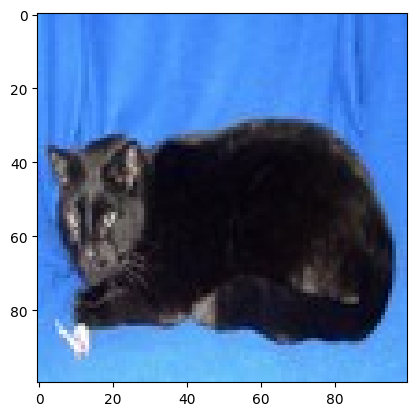

1/1 [==============================] - 0s 63ms/step
Our model says it is a : cat


In [133]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)